# 8.1 Scenario analysis

In lecture 8.1, we saw that there are several different ways that scenarios are used:
- Assessing interventions 
- Parameter changes
- Quantifying uncertainty
- Value of information analyses
- Sweeping over possibilities

We already saw some examples of assessing interventions in yesterday's sessions (see tutorial 7.1), so in this lecture we will focus on using scenarios to analyse parameter changes (problem 1), to quantify uncertainty (problem 2). 

## Problem 1

For our SIR model, there are some concerns that the virus may evolve to a more severe form which has a longer recovery time. The health authorities would like to understand the potential increase in burden that would be observed if the recovery time was twice as long.

To model this, we will actually make use of the "Intervention" class - even though viral evolution isn't really an intervention in the traditional sense! The "Intervention" class can be thought of more broadly as a way to make changes partway through running a simulation.

Initializing sim with 10000 agents
  Running 0.0 ( 0/31) (0.17 s)  ———————————————————— 3%
  Running 10.0 (10/31) (0.75 s)  •••••••————————————— 35%
  Running 20.0 (20/31) (1.38 s)  •••••••••••••——————— 68%
  Running 30.0 (30/31) (1.73 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/31) (0.08 s)  ———————————————————— 3%
  Running 10.0 (10/31) (0.33 s)  •••••••————————————— 35%
  Running 20.0 (20/31) (0.51 s)  •••••••••••••——————— 68%
  Running 30.0 (30/31) (0.71 s)  •••••••••••••••••••• 100%



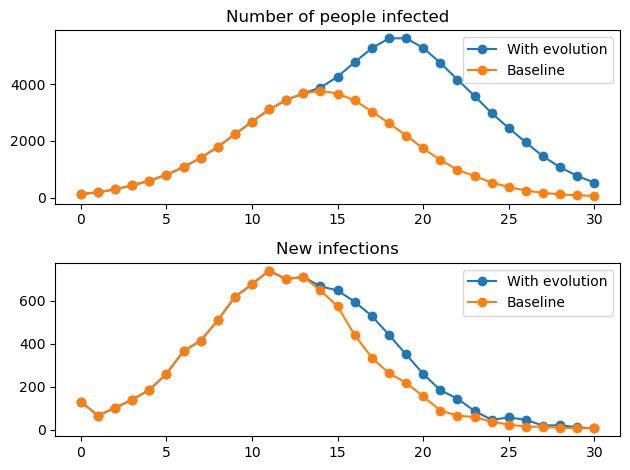

Number of additional infections with viral evolution: 33219.0
Percentage of additional infections with evolution: 0.7064265056141545


In [2]:
import numpy as np # Math
import sciris as sc # Utilities
import pylab as pl # Plotting
import starsim as ss # ABM


class ViralEvolution(ss.Intervention):  # Create a new, generic "intervention" that represents viral evolution

    def __init__(self, time_evolve=10, mean_dur_infection=10):
        super().__init__() # Initialize the intervention
        self.time_evolve = time_evolve  # Store the time at which the virus starts to evolve
        self.dur_infection = ss.normal(mean_dur_infection, 1)  # Store the new duration of infection

    def apply(self, sim):
        if sim.ti >= self.time_evolve: # Start making changes if we are up to the time where the virus starts to evolve
            sim.diseases.sir.pars.dur_inf = self.dur_infection


def make_run_sim(time_evolve=10, mean_dur_infection=10):

    # Make the "intervention"
    viral_evolution = ViralEvolution(time_evolve=time_evolve, mean_dur_infection=mean_dur_infection)  # Create the viral evolution 

    # Make the sim parameters
    pars = dict(start=0, end=30, dt=1.0, networks='random')  # Define the parameters of the simulation

    # Define two sims: without evolution and with
    beta = 0.05  # Define the per-contact probability of transmission
    baseline = ss.Sim(pars, diseases=ss.SIR(pars=dict(beta=beta)))  # Create the simulation with the SIR disease
    evolve_sim = ss.Sim(
        pars,
        diseases=ss.SIR(pars=dict(beta=beta)),
        interventions=[viral_evolution]
    ) # Create the simulation with the SIR disease and viral evolution

    # Run the three simulations
    baseline.run()
    evolve_sim.run()

    # Pull out results to plot
    tvec = baseline.yearvec
    n_inf_base = baseline.results.sir.n_infected
    n_inf_evolve = evolve_sim.results.sir.n_infected

    new_inf_base = baseline.results.sir.new_infections
    new_inf_evolve = evolve_sim.results.sir.new_infections

    # Create the figure
    pl.figure()

    # Plot number of people infected
    pl.subplot(2,1,1)  # Create the first panel in the plot
    pl.title('Number of people infected')
    pl.plot(tvec, n_inf_evolve, 'o-', label='With evolution')  # Plot with evolution
    pl.plot(tvec, n_inf_base, 'o-', label='Baseline')  # Plot baseline
    pl.legend()

    # Plot number of new infections
    pl.subplot(2,1,2) # Create the second panel in the plot
    pl.title('New infections')
    pl.plot(tvec, new_inf_evolve, 'o-', label='With evolution') # Plot with evolution
    pl.plot(tvec, new_inf_base, 'o-', label='Baseline') # Plot baseline
    pl.legend()

    sc.figlayout()
    pl.show()

    # Calculate and display how many additional infections there would be with viral evolution
    extra_infections = n_inf_evolve.sum() - n_inf_base.sum()
    print(f'Number of additional infections with viral evolution: {extra_infections}')
    print(f'Percentage of additional infections with evolution: {n_inf_evolve.sum()/n_inf_base.sum()-1}')



# Make, run, and plot the simulation
make_run_sim()


## Problem 2

For our SIS model, it is not known whether or not people with prior immunity are less transmissible. The government need to decide vaccination advice for people with a prior history of infection. The scale of impact will depend on how transmissible these people are. They have asked to see some ranges.


Initializing sim with 10000 agents
  Running "Sim with imm_boost=0.0": 2000.0 ( 0/31) (0.07 s)  ———————————————————— 3%
  Running "Sim with imm_boost=0.0": 2010.0 (10/31) (0.50 s)  •••••••————————————— 35%
  Running "Sim with imm_boost=0.0": 2020.0 (20/31) (1.01 s)  •••••••••••••——————— 68%
  Running "Sim with imm_boost=0.0": 2030.0 (30/31) (1.47 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running "Sim with imm_boost=0.2": 2000.0 ( 0/31) (0.08 s)  ———————————————————— 3%
  Running "Sim with imm_boost=0.2": 2010.0 (10/31) (0.63 s)  •••••••————————————— 35%
  Running "Sim with imm_boost=0.2": 2020.0 (20/31) (1.02 s)  •••••••••••••——————— 68%
  Running "Sim with imm_boost=0.2": 2030.0 (30/31) (1.34 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running "Sim with imm_boost=0.4": 2000.0 ( 0/31) (0.12 s)  ———————————————————— 3%
  Running "Sim with imm_boost=0.4": 2010.0 (10/31) (0.43 s)  •••••••————————————— 35%
  Running "Sim with imm_boost=0.4"

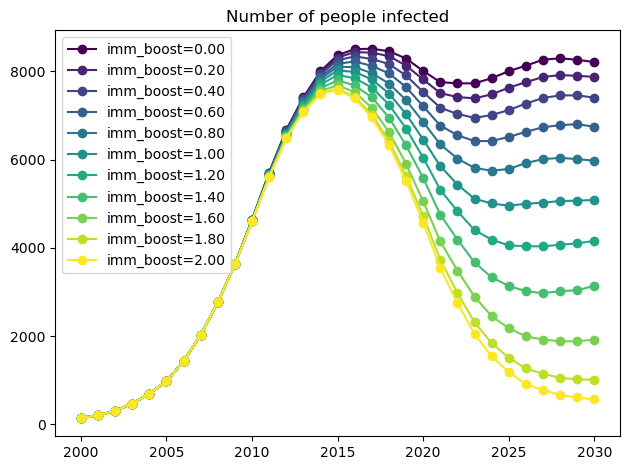

In [4]:
def make_run_sim(lower_imm_boost=0, upper_imm_boost=2, n_steps=11):

    # Make an array with different levels of immunie boosting
    imm_boost_array = np.linspace(lower_imm_boost, upper_imm_boost, n_steps)

    # Make the sim parameters
    pars = dict(start=2000, end=2030, dt=1.0, networks='random')  # Define the parameters of the simulation

    # Prepare a dictionary to store the results
    results = dict()

    # Set the per-contact transmission probability
    sis_beta = 0.05

    # Loop over different immunity parameters 
    for imm_boost in imm_boost_array:
        sis = ss.SIS(pars=dict(beta=sis_beta, imm_boost=imm_boost))  # Create an instance of the SIS disease with the particular imm_boost parameter
        sim = ss.Sim(pars=pars, diseases=sis, label=f'Sim with imm_boost={imm_boost}')  # Create the sim
        sim.run()  # Run the sim

        # Pull out results
        tvec = sim.yearvec
        n_inf = sim.results.sis.n_infected
        results[imm_boost] = n_inf  # Store results in a dictionary

    # Prepare to plot
    colors = sc.vectocolor(imm_boost_array)  # Create a continuous array of colors

    # Prepare a figure to plot all the results together
    pl.figure()
    pl.subplot(1,1,1) 

    # Loop over different immunity parameters and plot each one on the same figure
    for i,imm_boost in enumerate(imm_boost_array):
        pl.plot(tvec, results[imm_boost], 'o-', color=colors[i], label=f'imm_boost={imm_boost:.2f}')  # Plot with evolution

    # Add title and legend, format figure, and display results
    pl.title('Number of people infected')
    pl.legend()
    sc.figlayout()
    pl.show()



# Make, run, and plot the simulation
make_run_sim()

# Problem 3

In [3]:
import starsim as ss
import pylab as pl

def make_run_sim(beta=0.05, n_contacts=4):

    # Make the sim parameters
    pars = dict(
        start=0,
        end=30,
        dt=1.0, 
        verbose=0,
        diseases = dict(
            type = 'sir',
            beta = beta,
            ),
        networks=dict(
            type = 'random',
            n_contacts = ss.poisson(n_contacts))
    )

    sim = ss.Sim(pars)
    sim.run()

    # Calculate and display the number of infections
    n_inf = sim.results.sir.n_infected.sum()
    print(f'Total infections: {n_inf}')


# See impact of changing n_contacts
for n_contacts in range(1,10):
    print(f'\n\n\nNumber of contacts: {n_contacts}')
    make_run_sim(n_contacts=n_contacts)





Number of contacts: 1
Total infections: 616.0



Number of contacts: 2
Total infections: 1052.0



Number of contacts: 3
Total infections: 1846.0



Number of contacts: 4
Total infections: 3156.0



Number of contacts: 5
Total infections: 10210.0



Number of contacts: 6
Total infections: 20653.0



Number of contacts: 7
Total infections: 32837.0



Number of contacts: 8
Total infections: 40269.0



Number of contacts: 9
Total infections: 44124.0
